In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfFeatures = pd.read_csv('dfFeatures.csv')

In [3]:
X = dfFeatures[['phone_scaled'
                , 'last_name_scaled'
                , 'first_name_scaled'
                , 'city_scaled'
                , 'address_1_scaled'
                , 'dob_scaled'
                , 'zip_scaled'
                , 'similarity']]
y = dfFeatures['MATCH'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [4]:
clf = GaussianNB()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.9982725332791383
[[53056     3]
 [   14  4912]]
             precision    recall  f1-score   support

          0     0.9997    0.9999    0.9998     53059
          1     0.9994    0.9972    0.9983      4926

avg / total     0.9997    0.9997    0.9997     57985



In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.9979658258746948
[[53059     0]
 [   20  4906]]
             precision    recall  f1-score   support

          0     0.9996    1.0000    0.9998     53059
          1     1.0000    0.9959    0.9980      4926

avg / total     0.9997    0.9997    0.9997     57985



In [6]:
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.9998984874632016
[[53059     0]
 [    1  4925]]
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000     53059
          1     1.0000    0.9998    0.9999      4926

avg / total     1.0000    1.0000    1.0000     57985



In [7]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.9995938261575954
[[53059     0]
 [    4  4922]]
             precision    recall  f1-score   support

          0     0.9999    1.0000    1.0000     53059
          1     1.0000    0.9992    0.9996      4926

avg / total     0.9999    0.9999    0.9999     57985



In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [9]:
# Function to create model, required for KerasClassifier
def create_model():

    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    #model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=50, verbose=1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Epoch 1/20
117727/117727 [==============================] - 3s 23us/step - loss: 0.0475 - acc: 0.9887

In [11]:
dfFeatures.describe()

,Unnamed: 0,MATCH,phone_scaled,last_name_scaled,first_name_scaled,city_scaled,state_scaled,address_1_scaled,address_1_2_scaled,dob_scaled,zip_scaled,similarity
count,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000
mean,87855.500000,0.085361,0.234070,0.421152,0.484650,0.264359,0.805616,0.446980,-0.424675,0.491603,0.681775,0.184041
std,50723.829587,0.279419,0.263739,0.275777,0.216833,0.428125,0.137112,0.570004,0.348275,0.225368,0.135110,0.153283
min,0.000000,0.000000,-0.100000,-0.900000,-0.300000,-3.300000,0.300000,-2.700000,-3.000000,-0.100000,-0.900000,0.100000
25%,43927.750000,0.000000,0.100000,0.200000,0.300000,0.000000,0.700000,-0.100000,-0.600000,0.300000,0.600000,0.115384
50%,87855.500000,0.000000,0.200000,0.400000,0.400000,0.200000,0.700000,0.800000,-0.400000,0.500000,0.700000,0.135343
75%,131783.250000,0.000000,0.300000,0.500000,0.600000,0.500000,1.000000,1.000000,-0.200000,0.600000,0.700000,0.167072
max,175711.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features sorted by their score:
   Importance            Feature
0    0.379469         similarity
1    0.240685         dob_scaled
2    0.217948       phone_scaled
3    0.127557         zip_scaled
4    0.015390        city_scaled
5    0.009611  first_name_scaled
6    0.006265   address_1_scaled
7    0.003076   last_name_scaled


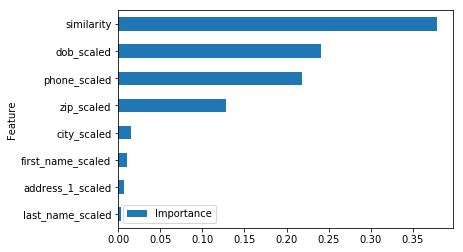

In [12]:
# Print the results
names = X.columns
f = pd.DataFrame(sorted(zip(clf.feature_importances_
                                       , names), reverse=True
                                  ), columns = ['Importance', 'Feature'])
print("Features sorted by their score:")
print(f)

f.plot(x='Feature',
                  y='Importance', kind='barh')
plt.gca().invert_yaxis()

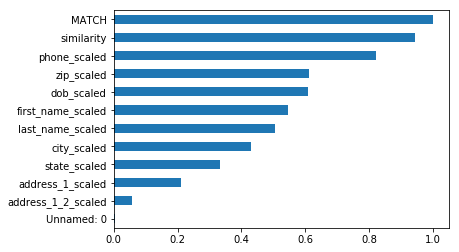

In [13]:
dfFeatures.corr()['MATCH'].sort_values().plot('barh')

In [14]:
dfFeatures.drop('MATCH', axis=1)

,Unnamed: 0,id_org,id_match,phone_scaled,last_name_scaled,first_name_scaled,city_scaled,state_scaled,address_1_scaled,address_1_2_scaled,dob_scaled,zip_scaled,similarity
0,0,rec-0-org,rec-0-dup-0,1.0,1.0,1.0,0.7,1.0,0.8,-0.3,1.0,1.0,0.683051
1,47132,rec-17305-org,rec-0-dup-0,0.0,0.8,1.0,0.2,0.8,-0.2,-0.5,0.5,0.7,0.138749
2,63515,rec-19801-org,rec-0-dup-0,0.0,0.4,0.4,0.4,0.7,0.3,-0.5,0.4,0.7,0.113165
3,89764,rec-23883-org,rec-0-dup-0,0.4,0.3,0.5,0.2,0.8,0.3,-0.5,0.7,0.6,0.101841
4,1,rec-0-org,rec-0-dup-1,0.9,0.8,0.9,1.0,1.0,0.8,-0.3,1.0,1.0,0.652186
5,53321,rec-18225-org,rec-0-dup-1,0.2,0.3,0.5,0.3,0.7,0.8,-0.3,0.7,0.8,0.135779
6,139930,rec-4547-org,rec-0-dup-1,0.2,0.4,0.4,-0.5,0.7,0.8,-0.3,0.5,0.7,0.104159
7,2,rec-0-org,rec-4547-dup-0,0.2,0.3,0.4,-0.4,0.7,1.0,-0.3,0.4,0.5,0.130793
8,25604,rec-13929-org,rec-4547-dup-0,0.1,0.4,0.6,0.9,1.0,0.4,-0.5,0.3,0.5,0.235433
9,53322,rec-18225-org,rec-4547-dup-0,0.3,0.2,0.4,-0.5,0.7,1.0,-0.3,0.4,0.5,0.109361


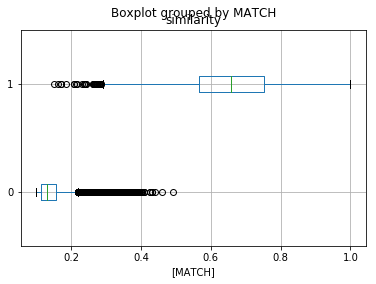

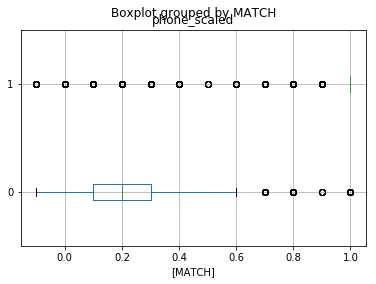

In [ ]:
plt.figure();

bp = dfFeatures[['MATCH', 'similarity']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'phone_scaled']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'last_name_scaled']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'dob_scaled']].boxplot(by='MATCH', vert=False)